### Required modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

### Load dataset

In [5]:
train = pd.read_csv('train-data.csv')

In [6]:
train.head(2)

,Name,City,M. Year,Kilometers_Driven,Engine_Fuel,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [7]:
train.shape

(6019, 13)

In [8]:
train.describe()

,M. Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Initial Run

# Perform EDA

### at present 'Name' and 'City' Columns are drop

In [9]:
train_new = pd.read_csv('Car-resell-price-prediction-main/train_data_car.csv')

In [10]:
train_new.columns

Index(['Company', 'Model', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [11]:
features = ['Name', 'City', 'M. Year', 'Kilometers_Driven', 'Engine_Fuel','Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','New_Price', 'Price', 'No_year']

In [12]:
cat_feature = ['M. Year', 'Engine_Fuel', 'Transmission', 'Owner_Type', 'Seats', 'No_year']

In [13]:
Num_feature = [ 'Kilometers_Driven','Mileage', 'Engine', 'Power']

In [14]:
# Car Company and car name splited 
# also manual cleaning done
# Columns Added : Company , Model
# Columns Removed : Name

In [15]:
train_new.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [16]:
train_new['No_Year'] = 2020 - train_new['Year']

In [17]:
train_new.head(4)

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No_Year
0,Maruti,Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8


In [18]:
# removing 'CC' and 'bhp' from Engine and Power columns

In [19]:
# def clean_one(cols):
#     eng = cols
#     for i in eng:
#         i = str(i)
#         temp = i.split(' ')
#         print(temp)
#         print(type(temp[0]))
#         print(type(temp))
# #         t2 = int(temp[0])
#         return temp[0]5983

In [20]:
train_new.shape

(5983, 15)

In [21]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            5983 non-null   object 
 1   Model              5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5981 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              5983 non-null   float64
 14  No_Year            5983 non-null   int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 701.3+ KB


In [22]:
# function to clean engine and power columns as it has the units added to it and
# was not considered in corr fucntion

def clean_engine(cols):
    for i in cols:
        temp = i.split()
        t2 = temp[0]
        t3 = int(t2)
        return t3

In [25]:
train_new['Engine_CC'] = train_new[['Engine']].apply(clean_engine, axis=1)

# train['Company'] = train[['Name']].apply(name_split, axis=1)

In [26]:
train_new.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No_Year,Engine_CC
0,Maruti,Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10,998
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,1582
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,1199
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,1248
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,1968


In [27]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            5983 non-null   object 
 1   Model              5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5981 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              5983 non-null   float64
 14  No_Year            5983 non-null   int64  
 15  Engine_CC          5983 non-null   int64  
dtypes: float64(2), int64(4),

In [28]:
def clean_power(cols):
    for i in cols:
        t1 = str(i)
        temp = t1.split()
        if temp[0] == 'null' or temp[0] == 'nan':
            return None
#             pa/ss
        else:
            t2 = temp[0]
            t3 = float(t2)
            return t3

In [29]:
train_new['Power_bhp'] = train[['Power']].apply(clean_power, axis=1)

In [30]:
train_new['Mileage_n'] = train[['Mileage']].apply(clean_power, axis=1)

In [31]:
train_new['Power_bhp'].nunique()

369

In [32]:
train_new.head()

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,No_Year,Engine_CC,Power_bhp,Mileage_n
0,Maruti,Wagon R,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,10,998,58.16,26.60
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,5,1582,126.20,19.67
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,9,1199,88.70,18.20
3,Maruti,Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,8,1248,88.76,20.77
4,Audi,A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,7,1968,140.80,15.20


In [33]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            5983 non-null   object 
 1   Model              5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5981 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              5983 non-null   float64
 14  No_Year            5983 non-null   int64  
 15  Engine_CC          5983 non-null   int64  
 16  Power_bhp          5841 

In [34]:
# dropping engine and power columns

In [35]:
train_new.drop(['Engine','Power','Mileage'], axis=1, inplace=True)

In [36]:
train_new.head(3)

,Company,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,No_Year,Engine_CC,Power_bhp,Mileage_n
0,Maruti,Wagon R,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,10,998,58.16,26.60
1,Hyundai,Creta,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,5,1582,126.20,19.67
2,Honda,Jazz,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,9,1199,88.70,18.20


In [37]:
train_new.corr()

,Year,Kilometers_Driven,Seats,Price,No_Year,Engine_CC,Power_bhp,Mileage_n
Year,1.000000,-0.172546,0.012333,0.306137,-1.000000,-0.052197,0.032066,-0.017756
Kilometers_Driven,-0.172546,1.000000,0.083113,-0.011316,0.172546,0.091068,-0.006663,0.013857
Seats,0.012333,0.083113,1.000000,0.052225,-0.012333,0.393337,0.015839,-0.001956
Price,0.306137,-0.011316,0.052225,1.000000,-0.306137,0.658354,0.049419,-0.027073
No_Year,-1.000000,0.172546,-0.012333,-0.306137,1.000000,0.052197,-0.032066,0.017756
Engine_CC,-0.052197,0.091068,0.393337,0.658354,0.052197,1.000000,0.039405,-0.012822
Power_bhp,0.032066,-0.006663,0.015839,0.049419,-0.032066,0.039405,1.000000,-0.537078
Mileage_n,-0.017756,0.013857,-0.001956,-0.027073,0.017756,-0.012822,-0.537078,1.000000


In [38]:
# #get correlations of each features in dataset
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

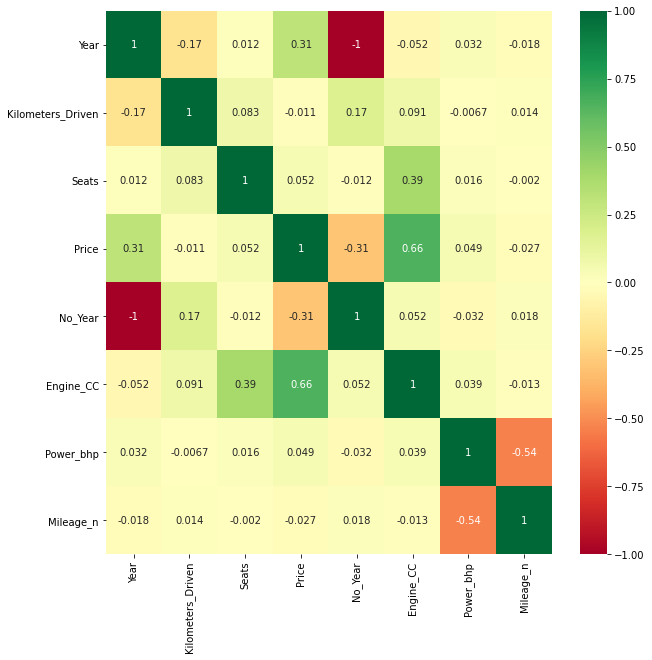

In [39]:
corrmap = train_new.corr()
top_corr_feat = corrmap.index
plt.figure(figsize=(10,10))
g = sns.heatmap(train_new[top_corr_feat].corr(), annot=True, cmap='RdYlGn')

In [40]:
train_new['Power_bhp'].isnull().sum()

142

In [41]:
train_new['Model'].nunique()

214

In [55]:
list1 = ['aditya','ranjeet','ranjeet','ranjeet']


 
    
l2 = [1, 2, 5,1,3,2,3,5,5]
s = pd.Series(l2)

In [56]:
s

0    1
1    2
2    5
3    1
4    3
5    2
6    3
7    5
8    5
dtype: int64

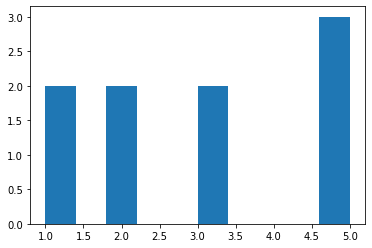

In [57]:
plt.hist(s)
plt.show()

<AxesSubplot:ylabel='Frequency'>

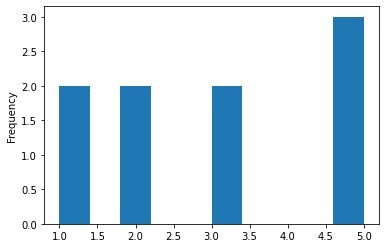

In [58]:
s.plot(kind="hist")

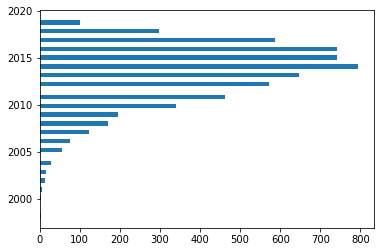

In [68]:
plt.hist(train_new['Year'], bins=45, orientation='horizontal')
plt.show()

In [85]:
def count_null(df):
    for i in df:
        print(i , ' : ', df[i].isnull().sum(), '\n__________\n')

In [86]:
count_null(train_new)

Company  :  0 
__________

Model  :  0 
__________

Location  :  0 
__________

Year  :  0 
__________

Kilometers_Driven  :  0 
__________

Fuel_Type  :  0 
__________

Transmission  :  0 
__________

Owner_Type  :  0 
__________

Seats  :  6 
__________

New_Price  :  5159 
__________

Price  :  0 
__________

No_Year  :  0 
__________

Engine_CC  :  0 
__________

Power_bhp  :  142 
__________

Mileage_n  :  2 
__________



In [87]:
# function to replace the null values in Power_bhp

In [88]:
def fillpow(cols):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-88-f58146666bf2>, line 2)

In [89]:
train_new['Power_bhp'].nunique()

369

In [90]:
train_new['Model'].nunique()

214

In [91]:
print(train_new)

        Company    Model    Location  Year  Kilometers_Driven Fuel_Type  \
0        Maruti  Wagon R      Mumbai  2010              72000       CNG   
1       Hyundai    Creta        Pune  2015              41000    Diesel   
2         Honda     Jazz     Chennai  2011              46000    Petrol   
3        Maruti   Ertiga     Chennai  2012              87000    Diesel   
4          Audi       A4  Coimbatore  2013              40670    Diesel   
...         ...      ...         ...   ...                ...       ...   
5978     Maruti    Swift       Delhi  2014              27365    Diesel   
5979    Hyundai    Xcent      Jaipur  2015             100000    Diesel   
5980   Mahindra     Xylo      Jaipur  2012              55000    Diesel   
5981     Maruti  Wagon R     Kolkata  2013              46000    Petrol   
5982  Chevrolet     Beat   Hyderabad  2011              47000    Diesel   

     Transmission Owner_Type  Seats  New_Price  Price  No_Year  Engine_CC  \
0          Manual     